* 为了准确，要使用二值化图像。需要进行阀值化处理或者Canny边界检测。

* 查找轮廓的函数会修改原始图像。如果之后想继续使用原始图像，应该将原始图像储存到其他变量中。

* 在OpenCV中，查找轮廓就像在黑色背景中超白色物体。你应该记住，要找的物体应该是白色而背景应该是黑色。

# 查找轮廓 cv2.findContours() （只接受二值图）
函数cv2.findContours()有三个参数，第一个是输入图像，第二个是轮廓检索模式，第三个是轮廓近似方法。返回值有三个，第一个是图像，第二个是轮廓，第三个是（轮廓的）层析结构。轮廓（第二个返回值）是一个Python列表，其中储存这图像中所有轮廓。每一个轮廓都是一个Numpy数组，包含对象边界点（x，y）的坐标。

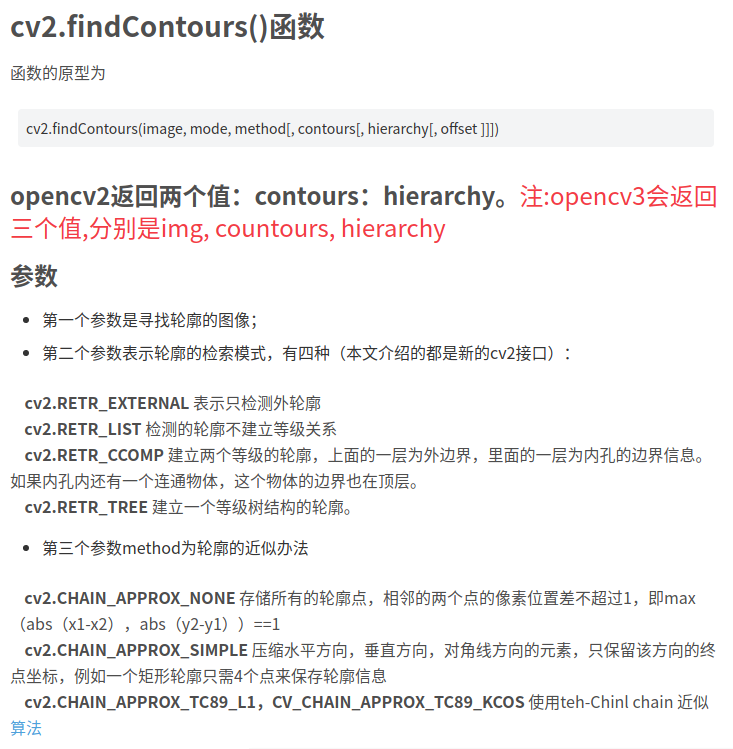
* hierarchy输出的矩阵参数的意义

后一个轮廓、前一个轮廓、父轮廓、内嵌轮廓的索引编号，



# 绘制轮廓  cv2.drawContours()
* cv2.findContours(image, mode, method[, contours[, hierarchy[, offset ]]])  

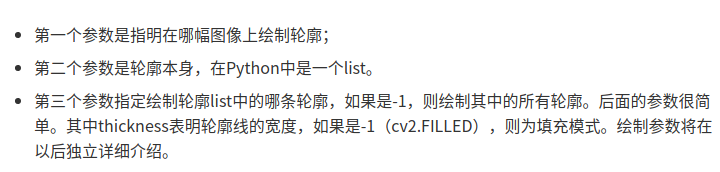

In [1]:
import numpy as np
import cv2

img = cv2.imread('j.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image ,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        # 寻找轮廓图，检索模式，轮廓近似方法
        # controus :返回一个list，list中每个元素都是图像中的一个轮廓。
        # hierarchy：一个list对应4个hierarchy值
        #            分别表示后一个轮廓、前一个轮廓、父轮廓、内嵌轮廓的索引编号，
        #            如果没有对应项，则该值为负数。
print(np.size(contours))  #总轮廓数
print(contours[0])   # 第一个轮廓坐标，0：对应第一个
print(hierarchy)  # 打印相应轮廓之间关系
#绘制独立轮廓，如第四个轮廓
imag = cv2.drawContours(img,contours,-1,(0,255,0),3) #-1：全部轮廓
#但是大多数时候，下面方法更有用
# contours = cv2.drawContours(img,contours,3,(0,255,0),3)  #3：父轮廓
        # 需要绘制的，轮廓list，给定要绘制list中的哪条（-1：绘制所有轮廓），
        # 颜色，宽度（-1：cv2.FILLED,填充模式）
while(1):
    cv2.imshow('img',img)
    cv2.imshow('imgray',imgray)
    cv2.imshow('image',image)
    cv2.imshow('contours',imag)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

/home/cxking/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


4
[[[ 67  31]]

 [[ 66  32]]

 [[ 66  33]]

 [[ 65  34]]

 [[ 65  35]]

 [[ 61  39]]

 [[ 61  40]]

 [[ 59  42]]

 [[ 59  43]]

 [[ 57  45]]

 [[ 57  46]]

 [[ 56  47]]

 [[ 56  48]]

 [[ 46  58]]

 [[ 45  58]]

 [[ 43  60]]

 [[ 42  60]]

 [[ 41  61]]

 [[ 40  61]]

 [[ 39  62]]

 [[ 37  62]]

 [[ 35  64]]

 [[ 33  64]]

 [[ 32  65]]

 [[ 31  65]]

 [[ 30  66]]

 [[ 27  66]]

 [[ 26  67]]

 [[ 19  67]]

 [[ 17  69]]

 [[ 17  73]]

 [[ 18  74]]

 [[ 29  74]]

 [[ 30  73]]

 [[ 31  73]]

 [[ 32  72]]

 [[ 35  72]]

 [[ 36  71]]

 [[ 37  71]]

 [[ 38  70]]

 [[ 39  70]]

 [[ 40  69]]

 [[ 42  69]]

 [[ 44  67]]

 [[ 45  67]]

 [[ 46  66]]

 [[ 47  66]]

 [[ 49  64]]

 [[ 50  64]]

 [[ 61  53]]

 [[ 62  54]]

 [[ 62  60]]

 [[ 61  61]]

 [[ 61  65]]

 [[ 60  66]]

 [[ 60  70]]

 [[ 59  71]]

 [[ 59  74]]

 [[ 58  75]]

 [[ 58  77]]

 [[ 57  78]]

 [[ 57  80]]

 [[ 56  81]]

 [[ 56  83]]

 [[ 55  84]]

 [[ 55  85]]

 [[ 54  86]]

 [[ 54  87]]

 [[ 53  88]]

 [[ 53  90]]

 [[ 52  91]]

 [[ 

# 轮廓特征 Contour Features 

## Image Moments 图像距 cv2.moments（）
图像矩是图像像素强度的某个特定加权平均值（矩）
## 轮廓面积 cv2.contourArea()
## 轮廓周长 cv2.arcLength()

## 轮廓近似 cv2.approxPolyDP(cnt,epsilon,True)
## 凸包 cv2.convexHull()
* 以用来检测一个曲线是否具有凸性缺陷，并能纠正缺陷。一般来说，凸性曲线总是凸出来的，至少是平的。如果有地方凹进去了就被叫做凸性缺陷。
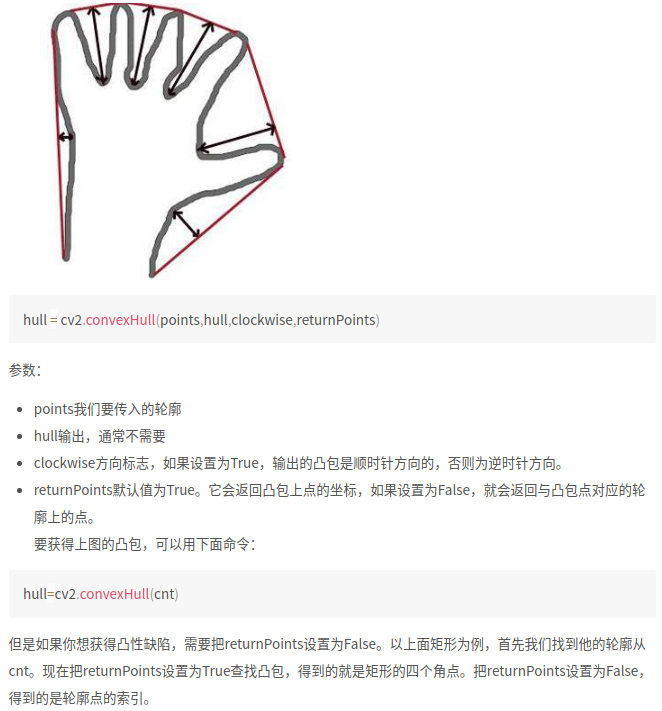
## 凸性检测 cv2.isContourConvex()
## 边界矩形 cv2.boundingRect()
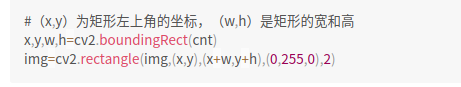
## 旋转矩形
## 最小外接圆 cv2.minEnclosingCircle()
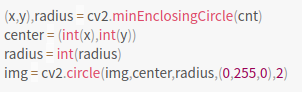
## 椭圆拟合 cv2.ellipse()
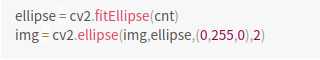
返回值其实就是旋转边界矩形的内切圆。
## 直线拟合 cv2.line（）
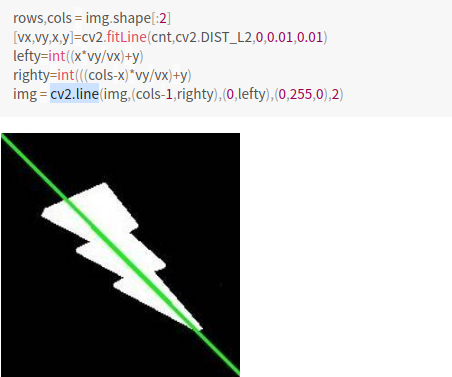

In [8]:
import cv2
import numpy as np

img = cv2.imread('j.png',0)
ret,thresh = cv2.threshold(img,175,255,cv2.THRESH_BINARY)
# image,contours,hierarchy = cv2.findContours(thresh, 1, 2)
image ,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]
#图像距
M = cv2.moments(cnt)
#轮廓面积
area = cv2.contourArea(cnt)
# 轮廓周长
perimeter = cv2.arcLength(cnt,True) # True：闭合形状
# 轮廓近似
epsilon=0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
        # 轮廓，原始轮廓和近似轮廓的最大距离，准确与否
# 凸包
hull = cv2.convexHull(cnt,True,True)
        #轮廓，输出（通常无要求），方向标志（true：顺时针凸包），是否返回坐标
# 获得凸包
k=cv2.isContourConvex(cnt)

#凸性检测
F = cv2.isContourConvex(cnt)  #只返回True或者False。


# # 无旋转边界矩形
# x,y,w,h=cv2.boundingRect(cnt) 
#         # （x,y）为矩形左上角的坐标，（w,h）是矩形的宽和高
# img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#         # 绘制边框
# #旋转边界矩形







print('图像距',M)
print('面积：',area)
print('周长：',perimeter)
print('近似轮廓：',approx)
print('凸包：',hull)
print('凸性：',F)
# cv2.imshow('凸包',k)
cv2.imshow('无旋转边框',img)
cv2.waitKey(0)&0xFF == ord('q')
cv2.destroyAllWindows()
# #质心
# cx = int(M['m10']/M['m00'])
# cy = int(M['m01']/M['m00'])

图像距 {'m00': 2370.5, 'm10': 115010.0, 'm01': 222949.66666666666, 'm20': 6683456.25, 'm11': 10036944.958333332, 'm02': 22976722.25, 'm30': 440181543.3, 'm21': 557793259.6833333, 'm12': 963574056.35, 'm03': 2516981556.8, 'mu20': 1103494.1744885044, 'mu11': -779946.4836971816, 'mu02': 2007916.5690138042, 'mu30': 8842149.362710118, 'mu21': 4884146.441939384, 'mu12': -4481294.359238192, 'mu03': -21715438.02906227, 'nu20': 0.19637677587912852, 'nu11': -0.13879853593038732, 'nu02': 0.35732692675064065, 'nu30': 0.03231900246220867, 'nu21': 0.01785207808731761, 'nu12': -0.01637961060021161, 'nu03': -0.07937225060786522}
面积： 2370.5
周长： 506.45793199539185
近似轮廓： [[[ 71  31]]

 [[ 19 140]]

 [[104  86]]]
凸包： [[[ 10 128]]

 [[ 10 131]]

 [[ 13 135]]

 [[ 17 139]]

 [[ 19 140]]

 [[ 28 140]]

 [[ 31 139]]

 [[ 33 138]]

 [[ 88  99]]

 [[ 95  94]]

 [[ 99  91]]

 [[104  86]]

 [[104  82]]

 [[ 73  33]]

 [[ 71  31]]

 [[ 67  31]]

 [[ 19  67]]

 [[ 17  69]]]
凸性： False


In [30]:
import cv2

# img = cv2.imread('yun1.jpeg')
img = cv2.imread('j.png')

# 灰度图像
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 二值化
ret, binary = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)
img1, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# # 最小外接圆
# for i in range(len(contours)):
#   (x, y), radius = cv2.minEnclosingCircle(contours[i])
#   center = (int(x), int(y))
#   radius = int(radius)
#   img1 = cv2.circle(img, center, radius, (0, 255, 0), 2)

# # 无旋转边界矩形
# cnt = contours[-1]
# x,y,w,h=cv2.boundingRect(cnt) 
#         # （x,y）为矩形左上角的坐标，（w,h）是矩形的宽和高
# img1=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#         # 绘制边框
#旋转边界矩形

# # 椭圆拟合
# cnt = contours[0]
# ellipse = cv2.fitEllipse(cnt)
# img1 = cv2.ellipse(img,ellipse,(0,255,0),2)

# # 直线拟合
# cnt = contours[-1]
# rows,cols = img.shape[:2]
# [vx,vy,x,y]=cv2.fitLine(cnt,cv2.DIST_L2,0,0.01,0.01)
# lefty=int((x*vy/vx)+y)
# righty=int(((cols-x)*vy/vx)+y)
# img1 = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

# #以云朵边界轮廓框出云朵
# img1 = cv2.drawContours(img, contours, -1, (0, 0, 255), 3)

cv2.imshow("img1", img1)
cv2.waitKey(0)&0xFF == ord('q')
cv2.destroyAllWindows()

# 边框特征
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html